# <center> Predicting Employees under Stress for Pre-emptive Remediation </center>

In [1]:
import numpy as n
import pandas as p
import matplotlib.pyplot as m
import seaborn as s
%matplotlib inline

Importing useful metrics and tools from <b>scikit</b> library

In [2]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import jaccard_similarity_score, confusion_matrix, classification_report, accuracy_score, log_loss

In [3]:
s.set_style("darkgrid")
m.rcParams['font.size'] = 14
m.rcParams['figure.figsize'] = (9, 5)
m.rcParams['figure.facecolor'] = '#00000000'

In [4]:
train_raw = p.read_csv('Train.csv', delimiter = ';')
train_raw

,EmployeeID,Target,Age,AvgDailyHours,Department,Education,EducationField,Gender,HasFlexibleTimings,IsIndividualContributor,...,RelationshipSatisfaction,RemoteWorkSatistfaction,SelfMotivationLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,WorkLoadLevel,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,100001,0,36.0,6.45,Sales,5,Technical Degree,Male,No,Yes,...,1,Medium,3,8.0,2,2,Low,8.0,1.0,8.0
1,100002,0,24.0,8.48,Sales,5,Technical Degree,Male,No,Yes,...,1,Very High,2,1.0,5,2,High,0.0,0.0,0.0
2,100003,0,45.0,6.93,Research & Development,2,Technical Degree,Female,No,Yes,...,4,High,1,17.0,6,4,Low,17.0,4.0,10.0
3,100004,1,29.0,7.10,Sales,4,Medical,Male,No,No,...,4,Medium,2,2.0,0,2,NaN,1.0,1.0,1.0
4,100005,0,30.0,7.30,Human Resources,3,Life Sciences,Female,No,Yes,...,1,Very High,4,9.0,6,1,Medium,3.0,3.0,0.0
5,100006,0,31.0,10.78,Sales,2,Medical,Male,Yes,Yes,...,2,High,1,9.0,0,4,High,2.0,2.0,2.0
6,100007,0,22.0,8.31,Research & Development,1,Marketing,Male,Yes,Yes,...,2,Very High,1,1.0,1,3,Low,1.0,1.0,1.0
7,100008,0,29.0,9.32,Sales,4,Human Resources,Male,No,No,...,3,High,3,5.0,5,3,Medium,5.0,5.0,4.0
8,100009,0,47.0,7.40,Research & Development,4,Human Resources,Female,No,No,...,4,Low,2,16.0,2,2,High,6.0,3.0,6.0
9,100010,0,43.0,6.08,Sales,2,Human Resources,Male,Yes,Yes,...,4,Very Low,3,16.0,4,1,Medium,7.0,0.0,1.0


In [5]:
train_raw[(train_raw.PerformanceRating == n.int64(4))].JobSatisfaction.value_counts()

4    1009
1    1006
2     984
3     961
Name: JobSatisfaction, dtype: int64

In [6]:
train_raw.columns

Index(['EmployeeID', 'Target', 'Age', 'AvgDailyHours', 'Department',
       'Education', 'EducationField', 'Gender', 'HasFlexibleTimings',
       'IsIndividualContributor', 'JobInvolvement', 'JobRole',
       'JobSatisfaction', 'LeavesTaken', 'MaritalStatus', 'MicromanagedAtWork',
       'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction',
       'RemoteWorkSatistfaction', 'SelfMotivationLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'WorkLoadLevel',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

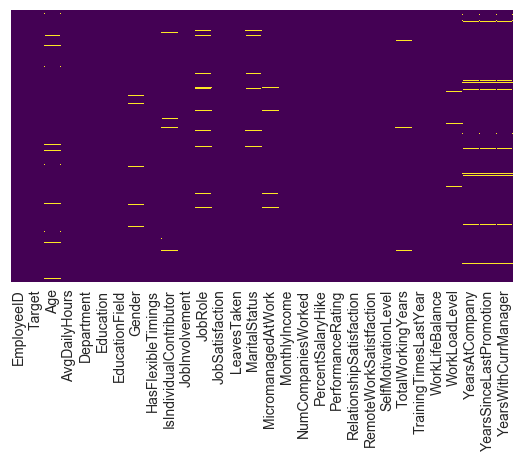

In [7]:
s.heatmap(train_raw.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [8]:
train_raw.isnull().sum(axis=0)

EmployeeID                    0
Target                        0
Age                         607
AvgDailyHours                 0
Department                    0
Education                     0
EducationField                0
Gender                      348
HasFlexibleTimings          169
IsIndividualContributor     325
JobInvolvement                0
JobRole                     370
JobSatisfaction               0
LeavesTaken                  49
MaritalStatus               234
MicromanagedAtWork          138
MonthlyIncome                 0
NumCompaniesWorked            0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
RemoteWorkSatistfaction       0
SelfMotivationLevel           0
TotalWorkingYears           333
TrainingTimesLastYear         0
WorkLifeBalance               0
WorkLoadLevel               413
YearsAtCompany              333
YearsSinceLastPromotion     333
YearsWithCurrManager        333
dtype: int64

In [9]:
train_raw.describe()

,EmployeeID,Target,Age,AvgDailyHours,Education,JobInvolvement,JobSatisfaction,LeavesTaken,MicromanagedAtWork,MonthlyIncome,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,SelfMotivationLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
count,16000.000000,16000.000000,15393.000000,16000.000000,16000.000000,16000.000000,16000.000000,15951.000000,15862.000000,1.600000e+04,...,16000.000000,16000.000000,16000.000000,16000.000000,15667.000000,16000.000000,16000.000000,15667.000000,15667.000000,15667.000000
mean,108000.500000,0.176250,38.966413,7.768878,3.001313,2.509063,2.494937,10.914175,3.001954,2.280443e+05,...,16.003000,2.493875,2.494687,2.488000,9.205464,3.004313,2.499125,4.557669,1.785792,2.017872
std,4618.946489,0.381045,12.365318,1.827135,1.410916,1.122329,1.116211,6.449444,1.413566,6.733454e+05,...,5.488681,1.116934,1.118559,1.118228,8.885191,2.003352,1.113026,5.864989,1.695834,2.441463
min,100001.000000,0.000000,18.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.017000e+03,...,7.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,104000.750000,0.000000,28.000000,6.660000,2.000000,2.000000,1.000000,6.000000,2.000000,3.333300e+04,...,11.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,0.000000,0.000000,0.000000
50%,108000.500000,0.000000,39.000000,7.400000,3.000000,3.000000,2.000000,9.000000,3.000000,1.250000e+05,...,16.000000,2.000000,2.000000,2.000000,6.000000,3.000000,2.000000,2.000000,1.000000,1.000000
75%,112000.250000,0.000000,50.000000,8.490000,4.000000,4.000000,3.000000,15.000000,4.000000,2.416670e+05,...,21.000000,3.000000,3.000000,3.000000,15.000000,5.000000,3.000000,7.000000,3.000000,3.000000
max,116000.000000,1.000000,60.000000,18.340000,5.000000,4.000000,4.000000,30.000000,5.000000,7.916670e+06,...,25.000000,4.000000,4.000000,4.000000,39.000000,6.000000,4.000000,38.000000,5.000000,10.000000


In [10]:
train_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 30 columns):
EmployeeID                  16000 non-null int64
Target                      16000 non-null int64
Age                         15393 non-null float64
AvgDailyHours               16000 non-null float64
Department                  16000 non-null object
Education                   16000 non-null int64
EducationField              16000 non-null object
Gender                      15652 non-null object
HasFlexibleTimings          15831 non-null object
IsIndividualContributor     15675 non-null object
JobInvolvement              16000 non-null int64
JobRole                     15630 non-null object
JobSatisfaction             16000 non-null int64
LeavesTaken                 15951 non-null float64
MaritalStatus               15766 non-null object
MicromanagedAtWork          15862 non-null float64
MonthlyIncome               16000 non-null int64
NumCompaniesWorked          16000 non-null 

In [11]:
df = train_raw.dropna()

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13554 entries, 0 to 15999
Data columns (total 30 columns):
EmployeeID                  13554 non-null int64
Target                      13554 non-null int64
Age                         13554 non-null float64
AvgDailyHours               13554 non-null float64
Department                  13554 non-null object
Education                   13554 non-null int64
EducationField              13554 non-null object
Gender                      13554 non-null object
HasFlexibleTimings          13554 non-null object
IsIndividualContributor     13554 non-null object
JobInvolvement              13554 non-null int64
JobRole                     13554 non-null object
JobSatisfaction             13554 non-null int64
LeavesTaken                 13554 non-null float64
MaritalStatus               13554 non-null object
MicromanagedAtWork          13554 non-null float64
MonthlyIncome               13554 non-null int64
NumCompaniesWorked          13554 non-null 

## Visualizing data for a better insight 

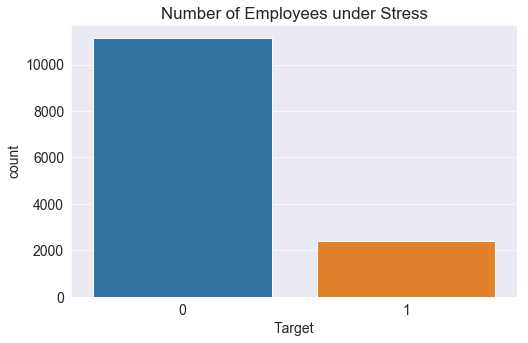

In [13]:
m.figure(figsize=(8,5))
m.title('Number of Employees under Stress')
s.countplot(x = df.Target)

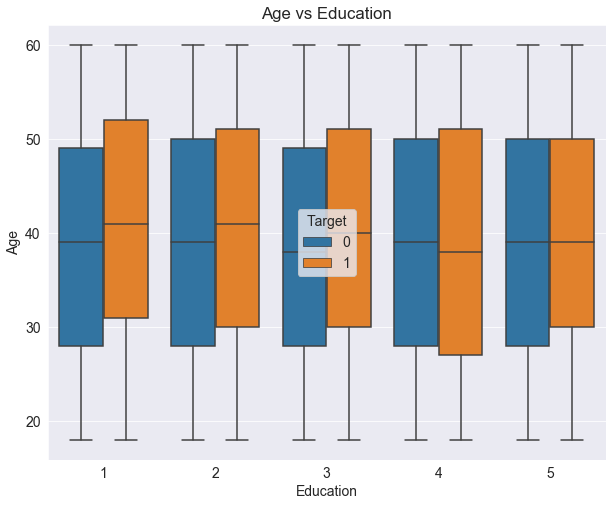

In [14]:
m.figure(figsize=(10,8))
m.title('Age vs Education')

s.boxplot(train_raw.Education, train_raw.Age, hue=train_raw.Target)

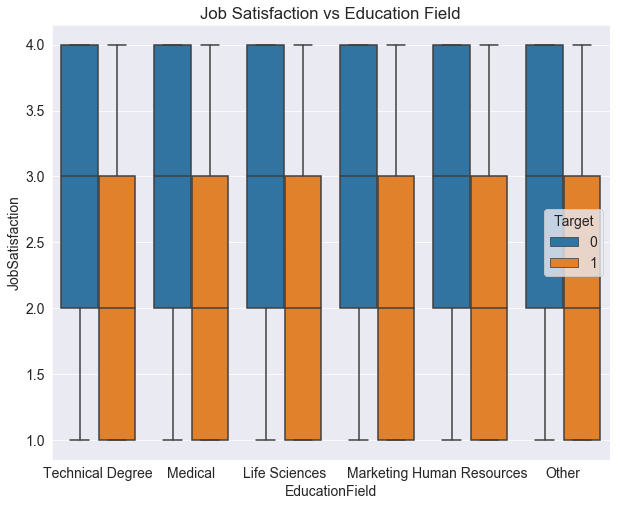

In [15]:
m.figure(figsize=(10,8))
m.title('Job Satisfaction vs Education Field')
s.boxplot(train_raw.EducationField, train_raw.JobSatisfaction, hue=train_raw.Target)

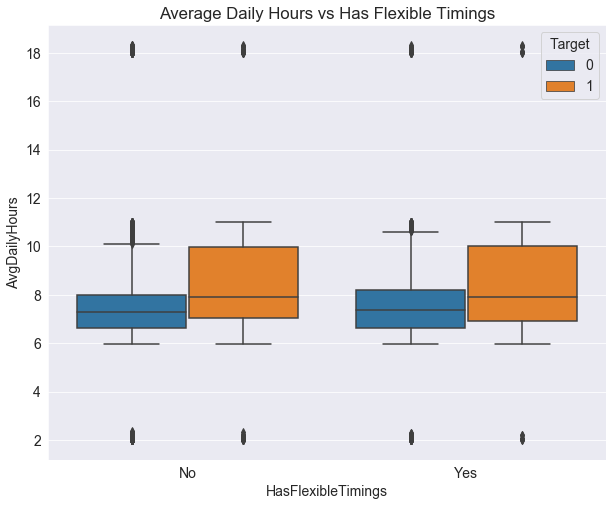

In [100]:
m.figure(figsize=(10,8))
m.title('Average Daily Hours vs Has Flexible Timings')
s.boxplot(train_raw.HasFlexibleTimings, train_raw.AvgDailyHours, hue=train_raw.Target)

<b>The above plot shows a significant aspect of how timings affect the levels of stress amongst employees.</b>

C:\Users\Shagun Sharma\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


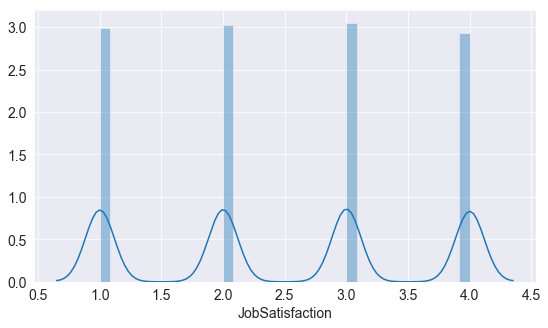

In [16]:
s.distplot(df['JobSatisfaction'])

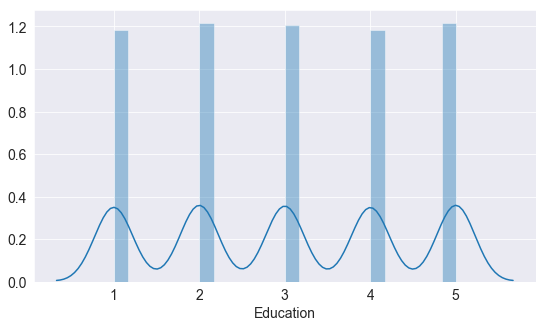

In [17]:
s.distplot(df['Education'])

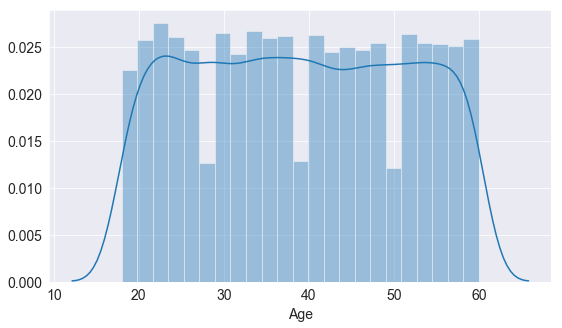

In [18]:
s.distplot(df['Age'])

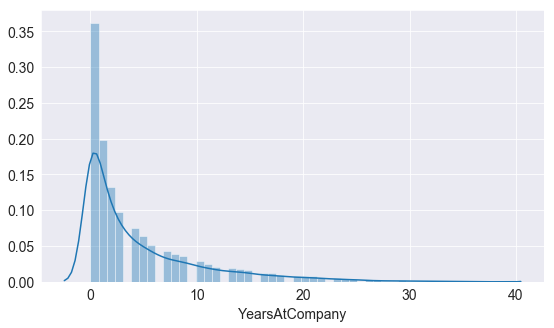

In [19]:
s.distplot(df['YearsAtCompany'])

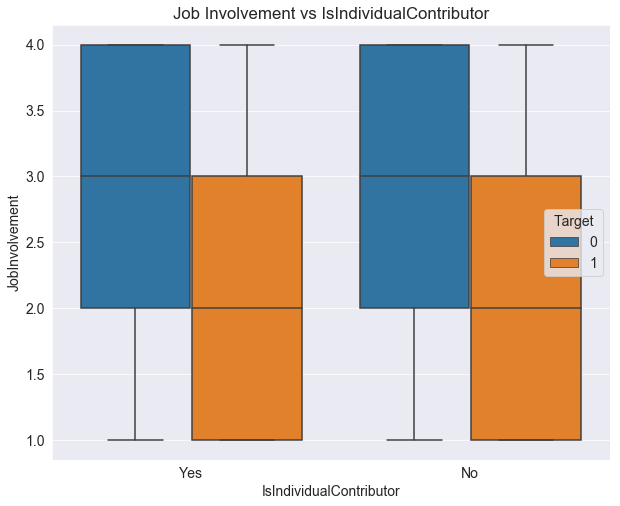

In [103]:
m.figure(figsize=(10,8))
m.title('Job Involvement vs IsIndividualContributor')
s.boxplot(train_raw.IsIndividualContributor, train_raw.JobInvolvement, hue=train_raw.Target)

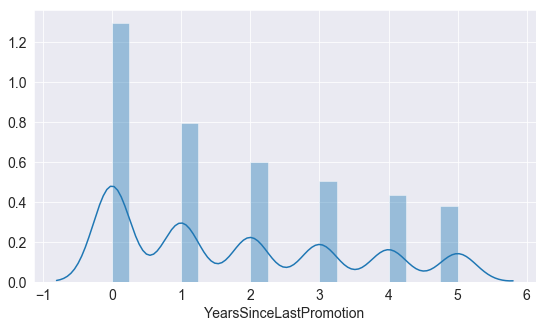

In [20]:
s.distplot(df['YearsSinceLastPromotion'])

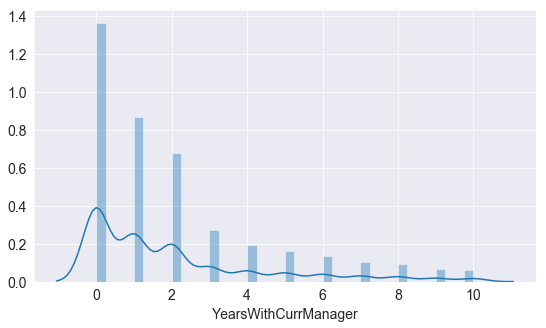

In [21]:
s.distplot(df['YearsWithCurrManager'])

## Defining Utility Functions

In [22]:
def Data_Processor(temp_frame):
    
    from sklearn.preprocessing import LabelEncoder
    label_encoder = LabelEncoder()
    temp = p.DataFrame()
    temp_frame['HasFlexibleTimings']= label_encoder.fit_transform(temp_frame['HasFlexibleTimings']) 
    temp_frame['IsIndividualContributor']= label_encoder.fit_transform(temp_frame['IsIndividualContributor']) 
    temp_frame['RemoteWorkSatistfaction']= label_encoder.fit_transform(temp_frame['RemoteWorkSatistfaction']) 
    temp_frame['WorkLoadLevel']= label_encoder.fit_transform(temp_frame['WorkLoadLevel']) 
    temp = p.concat([p.get_dummies(temp_frame[col]) for col in ['Department','EducationField', 'Gender', 'JobRole', 'MaritalStatus']], axis=1)
    temp.groupby(level=0, axis=1).sum()
    temp_frame = p.concat([temp_frame, temp], axis=1)
    temp_frame.drop(['Department','EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'EmployeeID'], axis=1, inplace=True)

    return temp_frame;

In [23]:
def Normalize(df):
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    frame = p.DataFrame();
    frame = df
    frame.loc[:, ['Age', 'AvgDailyHours','LeavesTaken', 'MonthlyIncome', 
           'PercentSalaryHike', 'TotalWorkingYears', 'YearsAtCompany', 'YearsWithCurrManager']] = scaler.fit_transform(frame.loc[:, ['Age', 'AvgDailyHours','LeavesTaken', 'MonthlyIncome', 
           'PercentSalaryHike', 'TotalWorkingYears', 'YearsAtCompany', 'YearsWithCurrManager']]);
    return frame;

In [24]:
df = Data_Processor(df)

C:\Users\Shagun Sharma\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Shagun Sharma\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\Shagun Sharma\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pa

In [25]:
df

,Target,Age,AvgDailyHours,Education,HasFlexibleTimings,IsIndividualContributor,JobInvolvement,JobSatisfaction,LeavesTaken,MicromanagedAtWork,...,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative,Divorced,Married,Single
0,0,36.0,6.45,5,0,1,1,2,7.0,3.0,...,0,0,1,0,0,0,0,1,0,0
1,0,24.0,8.48,5,0,1,1,4,9.0,4.0,...,0,0,0,0,0,0,1,0,1,0
2,0,45.0,6.93,2,0,1,3,4,24.0,4.0,...,0,0,1,0,0,0,0,0,1,0
4,0,30.0,7.30,3,0,1,2,4,9.0,5.0,...,0,0,0,0,0,0,0,0,0,1
5,0,31.0,10.78,2,1,1,4,4,11.0,3.0,...,0,0,0,1,0,0,0,1,0,0
6,0,22.0,8.31,1,1,1,4,3,4.0,3.0,...,0,0,0,1,0,0,0,0,0,1
7,0,29.0,9.32,4,0,0,3,1,18.0,3.0,...,0,0,0,1,0,0,0,0,0,1
8,0,47.0,7.40,4,0,0,1,4,16.0,2.0,...,0,1,0,0,0,0,0,0,1,0
9,0,43.0,6.08,2,1,1,1,4,13.0,4.0,...,0,0,0,0,0,0,0,0,0,1
10,0,51.0,8.38,5,0,1,1,4,14.0,5.0,...,0,0,0,0,0,1,0,1,0,0


In [26]:
norm_df = Normalize(df)

C:\Users\Shagun Sharma\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Shagun Sharma\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [27]:
norm_df

,Target,Age,AvgDailyHours,Education,HasFlexibleTimings,IsIndividualContributor,JobInvolvement,JobSatisfaction,LeavesTaken,MicromanagedAtWork,...,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative,Divorced,Married,Single
0,0,-0.242771,-0.727341,5,0,1,1,2,-0.606832,3.0,...,0,0,1,0,0,0,0,1,0,0
1,0,-1.212807,0.390193,5,0,1,1,4,-0.297836,4.0,...,0,0,0,0,0,0,1,0,1,0
2,0,0.484755,-0.463096,2,0,1,3,4,2.019630,4.0,...,0,0,1,0,0,0,0,0,1,0
4,0,-0.727789,-0.259408,3,0,1,2,4,-0.297836,5.0,...,0,0,0,0,0,0,0,0,0,1
5,0,-0.646953,1.656365,2,1,1,4,4,0.011159,3.0,...,0,0,0,1,0,0,0,1,0,0
6,0,-1.374479,0.296607,1,1,1,4,3,-1.070325,3.0,...,0,0,0,1,0,0,0,0,0,1
7,0,-0.808625,0.852621,4,0,0,3,1,1.092644,3.0,...,0,0,0,1,0,0,0,0,0,1
8,0,0.646428,-0.204357,4,0,0,1,4,0.783648,2.0,...,0,1,0,0,0,0,0,0,1,0
9,0,0.323083,-0.931029,2,1,1,1,4,0.320155,4.0,...,0,0,0,0,0,0,0,0,0,1
10,0,0.969773,0.335142,5,0,1,1,4,0.474653,5.0,...,0,0,0,0,0,1,0,1,0,0


### Plotting a Heatmap to find <b>Correlations</b> visually amongst the <b>Dependent</b> and <b>Independent variables</b>

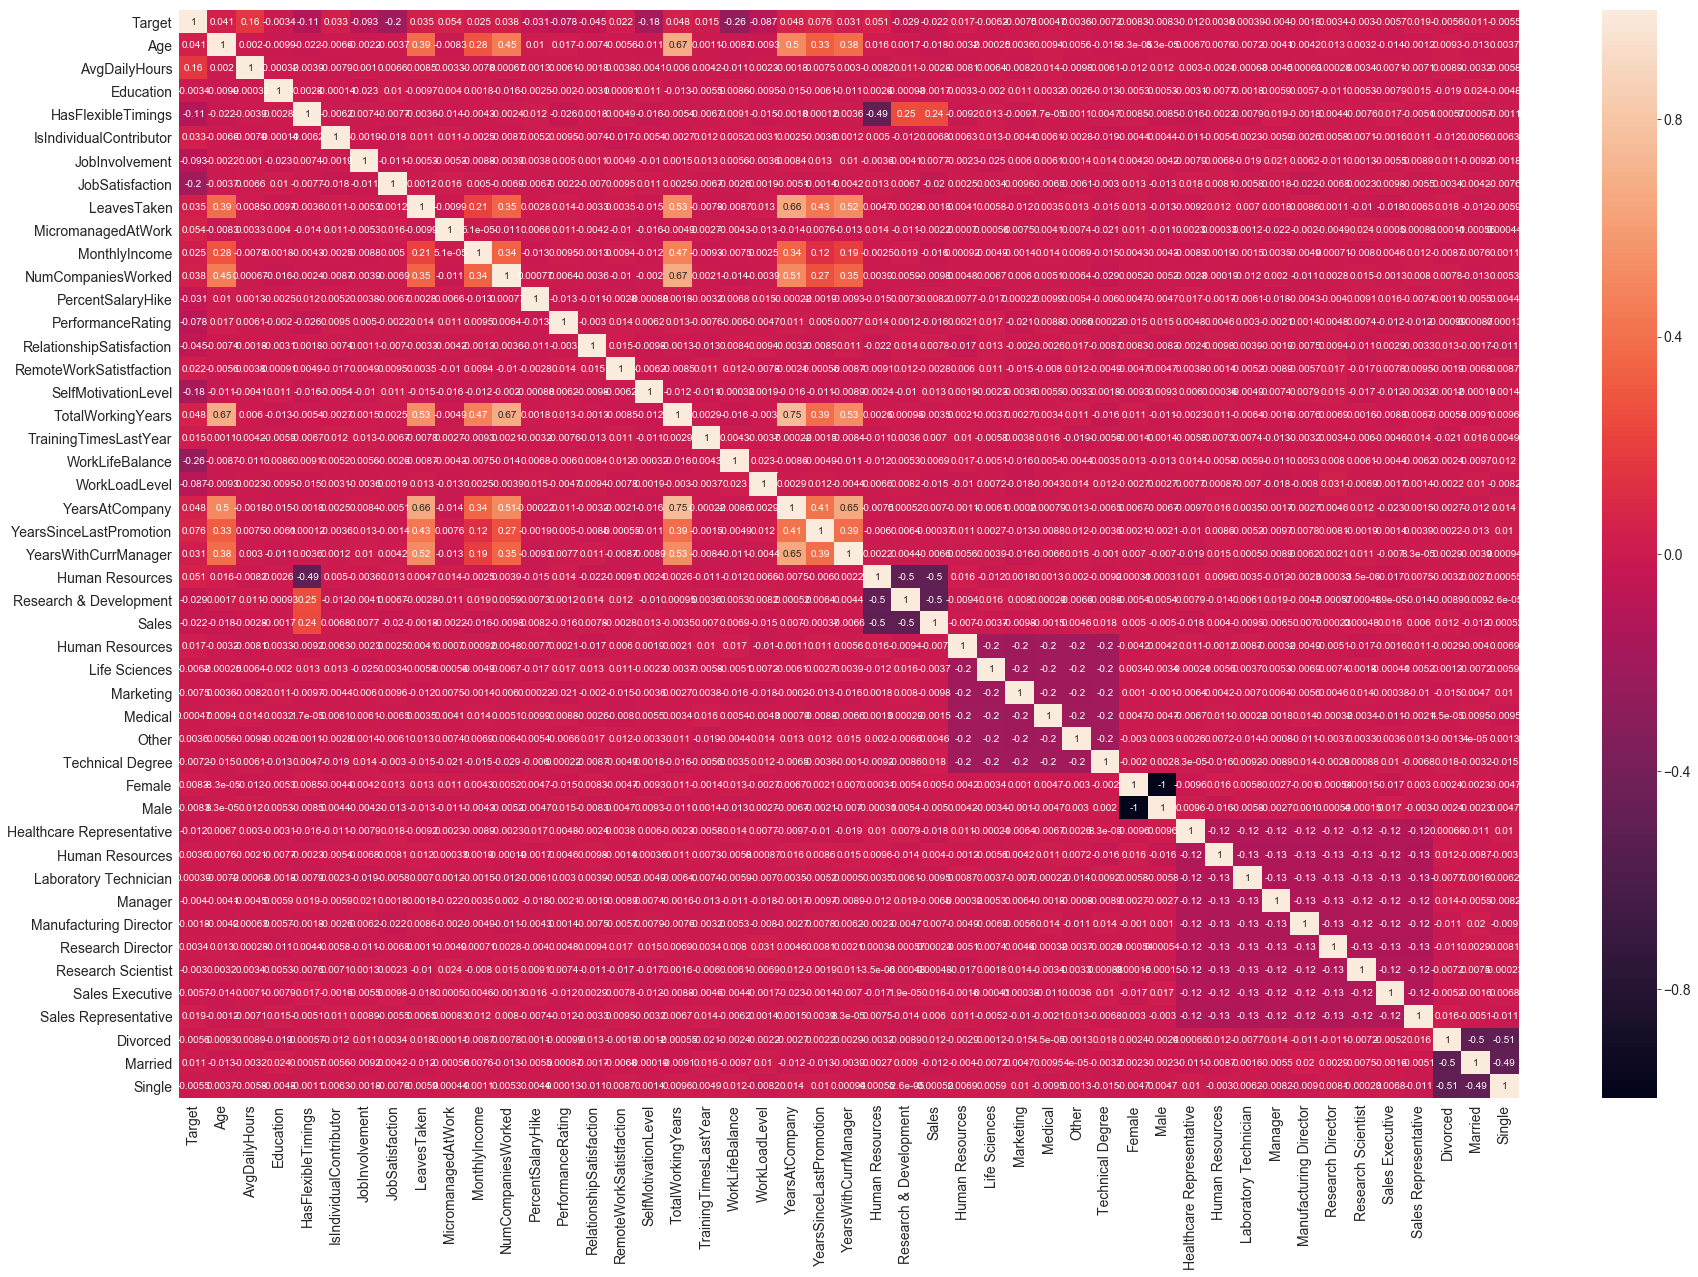

In [28]:
m.figure(figsize=(30,20))
s.heatmap(norm_df.corr(),annot=True, annot_kws={"fontsize":10})

In [29]:
norm_df.columns

Index(['Target', 'Age', 'AvgDailyHours', 'Education', 'HasFlexibleTimings',
       'IsIndividualContributor', 'JobInvolvement', 'JobSatisfaction',
       'LeavesTaken', 'MicromanagedAtWork', 'MonthlyIncome',
       'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'RemoteWorkSatistfaction',
       'SelfMotivationLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'WorkLoadLevel', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Human Resources',
       'Research & Development', 'Sales', 'Human Resources', 'Life Sciences',
       'Marketing', 'Medical', 'Other', 'Technical Degree', 'Female', 'Male',
       'Healthcare Representative', 'Human Resources', 'Laboratory Technician',
       'Manager', 'Manufacturing Director', 'Research Director',
       'Research Scientist', 'Sales Executive', 'Sales Representative',
       'Divorced', 'Married', 'Single'],
      dtype='object')

In [30]:
X = norm_df[['Age', 'AvgDailyHours', 'Education', 'HasFlexibleTimings',
       'IsIndividualContributor', 'JobInvolvement', 'JobSatisfaction',
       'LeavesTaken', 'MicromanagedAtWork', 'MonthlyIncome',
       'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'RemoteWorkSatistfaction',
       'SelfMotivationLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'WorkLoadLevel', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Human Resources',
       'Research & Development', 'Sales', 'Human Resources', 'Life Sciences',
       'Marketing', 'Medical', 'Other', 'Technical Degree', 'Female', 'Male',
       'Healthcare Representative', 'Human Resources', 'Laboratory Technician',
       'Manager', 'Manufacturing Director', 'Research Director',
       'Research Scientist', 'Sales Executive', 'Sales Representative',
       'Divorced', 'Married', 'Single']]

y = norm_df['Target']

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=40)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (10843, 52) (10843,)
Test set: (2711, 52) (2711,)


We shall now begin training different <b>Classification Models</b> on the processed data.

Each model's hyperparameters will be tuned using <b>Grid Search</b> for optimized parameters and once the best fit is found, the model can be further optimized using Feature Selection.

### Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
logistic = LogisticRegression(C=0.01, solver='liblinear')
logistic.fit(X_train,y_train)
logistic

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [33]:
yhatlr = logistic.predict(X_test)
yhatlr

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [34]:
jaccard_similarity_score(y_test, yhatlr)

0.8458133530062707

In [35]:
log_loss(y_test, yhatlr)

5.325425792182166

In [36]:
log_grid_param = {'C': [0.64, 0.66, 0.67, 0.68, 0.69, 0.7, 0.75],
                 'solver':['liblinear', 'sag', 'saga']}

In [37]:
log_grid_srch = GridSearchCV(estimator=logistic, param_grid=log_grid_param, scoring='accuracy', 
                            n_jobs=-1)

In [38]:
log_grid_srch.fit(X_train, y_train)

C:\Users\Shagun Sharma\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Shagun Sharma\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'C': [0.64, 0.66, 0.67, 0.68, 0.69, 0.7, 0.75], 'solver': ['liblinear', 'sag', 'saga']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [39]:
logistic_best_parameters = log_grid_srch.best_params_
print(logistic_best_parameters)

{'C': 0.64, 'solver': 'sag'}


In [40]:
logistic_best_result = log_grid_srch.best_score_
print('Accuracy of Logistic Regression: ', logistic_best_result)

Accuracy of Logistic Regression:  0.8765101909065757


## Optimized Hyperparameters are: 
<br>
<ol>
    <li>C = 0.64</li>
    <li>solver = 'sag'</li>
</ol>
<br>
With an accuracy of <b>87.65101909065757 %</b>

## Decision Tree

In [41]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion="entropy", max_depth = 8)
dtree

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=8,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [42]:
dtree.fit(X_train, y_train)
yhattr = dtree.predict(X_test)

In [43]:
print("Accuracy of Decision Tree: ",accuracy_score(y_test, yhattr))

Accuracy of Decision Tree:  0.8554039099963113


In [44]:
dec_tree_grid_param = {'criterion': ['gini', 'entropy'], 'max_depth':[ 6.8, 6.9, 7,7.1, 7.2, 7.3, 7.4, 7.5]}

dec_tree_grd_srch = GridSearchCV(estimator=dtree, param_grid=dec_tree_grid_param, scoring='accuracy', 
                            n_jobs=-1)

In [45]:
dec_tree_grd_srch.fit(X_train, y_train)

C:\Users\Shagun Sharma\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=8,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [6.8, 6.9, 7, 7.1, 7.2, 7.3, 7.4, 7.5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [46]:
dec_tree_best_params = dec_tree_grd_srch.best_params_
print(dec_tree_best_params)

{'criterion': 'entropy', 'max_depth': 6.9}


In [47]:
dec_tree_best_result = dec_tree_grd_srch.best_score_
print(dec_tree_best_result)

0.8671032002213409


## Optimized Hyperparameters are: 
<br>
<ol>
    <li>criterion = 'entopy'</li>
    <li>max_depth = 6.9</li>
</ol>
<br>
With an accuracy of <b>86.71032002213409 %</b>

## Support Vector Machines

In [48]:
from sklearn import svm
svm_clf = svm.SVC(C= 0.5, kernel='rbf')
svm_clf.fit(X_train, y_train) 

C:\Users\Shagun Sharma\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=0.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [49]:
yhatsvm = svm_clf.predict(X_test)
print(classification_report(y_test, yhatsvm))
print("Accuracy of SVM: ",accuracy_score(y_test, yhatsvm))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92      2194
           1       0.95      0.29      0.44       517

   micro avg       0.86      0.86      0.86      2711
   macro avg       0.90      0.64      0.68      2711
weighted avg       0.87      0.86      0.83      2711

Accuracy of SVM:  0.8609369236444117


In [50]:
svm_grid_param = {'C':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8],
                  'kernel':['rbf', 'linear', 'poly', 'sigmoid']}

svm_grd_srch = GridSearchCV(estimator=svm_clf, param_grid=svm_grid_param, scoring='accuracy', 
                            n_jobs=-1)

In [51]:
svm_grd_srch.fit(X_train, y_train)

C:\Users\Shagun Sharma\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Shagun Sharma\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=0.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8], 'kernel': ['rbf', 'linear', 'poly', 'sigmoid']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [52]:
svm_best_params = svm_grd_srch.best_params_
print(svm_best_params)

{'C': 0.8, 'kernel': 'rbf'}


In [53]:
svm_best_result = svm_grd_srch.best_score_
print(svm_best_result)

0.8730978511482063


## Optimized Hyperparameters are: 
<br>
<ol>
    <li>C = 0.8</li>
    <li>kernel = 'rbf'</li>
</ol>
<br>
With an accuracy of <b>87.30978511482063 %</b>

## K - Nearest Neighbours

In [54]:
from sklearn.neighbors import KNeighborsClassifier

In [55]:
import numpy as n
ks = 10
error_rate = []

# Will take some time
for i in range(1,ks):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    yhatknn = knn.predict(X_test)
    error_rate.append(n.mean(yhatknn != y_test))

Text(0, 0.5, 'Error Rate')

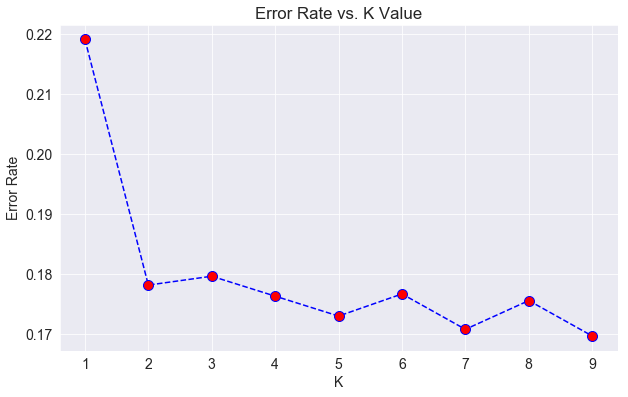

In [56]:
m.figure(figsize=(10,6))
m.plot(range(1,ks),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
m.title('Error Rate vs. K Value')
m.xlabel('K')
m.ylabel('Error Rate')

In [57]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
yhatknn = knn.predict(X_test)

In [58]:
print("Accuracy of KNN: ", accuracy_score(y_test, yhatknn))

Accuracy of KNN:  0.8270011066027296


## Optimized Hyperparameters are: 
<br>
<ol>
    <li>k = 5</li>
</ol>
<br>
With an accuracy of <b>82.70011066027296 %</b>

## Random Forest Classifier

In [59]:
from sklearn.ensemble import RandomForestClassifier
rndm_frst = RandomForestClassifier(n_estimators=300, random_state=10)

In [60]:
rndm_frst.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=None,
            oob_score=False, random_state=10, verbose=0, warm_start=False)

In [61]:
yhatrf = rndm_frst.predict(X_test)

In [62]:
print("Accuracy of Random Forest: ", accuracy_score(y_test, yhatrf))

Accuracy of Random Forest:  0.8605680560678717


In [63]:
rndm_frst_grid_param = {
    'n_estimators': [900, 925, 950, 975, 1000],
    'criterion': ['gini', 'entropy']}

rndm_frst_grd_srch = GridSearchCV(estimator=rndm_frst,
                     param_grid=rndm_frst_grid_param,
                     scoring='accuracy', n_jobs=-1)

In [64]:
rndm_frst_grd_srch.fit(X_train, y_train)

C:\Users\Shagun Sharma\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=None,
            oob_score=False, random_state=10, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [900, 925, 950, 975, 1000], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [65]:
rndm_frst_best_params = rndm_frst_grd_srch.best_params_
print(rndm_frst_best_params)

{'criterion': 'gini', 'n_estimators': 1000}


In [66]:
rndm_frst_best_result = rndm_frst_grd_srch.best_score_
print(rndm_frst_best_result)

0.8680254542100895


## Optimized Hyperparameters are: 
<br>
<ol>
    <li>criterion = 'gini'</li>
    <li>n_estimators = 1000</li>
</ol>
<br>
With an accuracy of <b>86.80254542100895 %</b>

# <center>Feature Selection</center>

In [67]:
# Using the Recursive Feature Selection, a type of wrapper feature selection method
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [68]:
lr_model = LogisticRegression()
rfe = RFE(lr_model, 30)
fit_lr_30 = rfe.fit(X, y)

print("Num Features: %s" % (fit_lr_30.n_features_))
print("Selected Features: %s" % (fit_lr_30.support_))
print("Feature Ranking: %s" % (fit_lr_30.ranking_))

feat_30_lr_mask = fit_lr_30.support_

C:\Users\Shagun Sharma\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Shagun Sharma\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Shagun Sharma\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Shagun Sharma\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Shagun Sharma\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs

Num Features: 30
Selected Features: [False  True False  True  True  True  True False False False False False
  True False False  True False False  True  True False  True False  True
  True False  True  True  True  True False  True  True  True  True  True
  True  True False  True  True False False False False  True False False
  True  True  True  True]
Feature Ranking: [21  1 23  1  1  1  1 16 11 22 20 12  1 10 14  1 15 19  1  1 17  1 18  1
  1  9  1  1  1  1 13  1  1  1  1  1  1  1  8  1  1  2  7  3  5  1  6  4
  1  1  1  1]


In [69]:
selected_30_feat_lr = []
selected_30_feat_lr = n.array(X.columns)[feat_30_lr_mask]
X_selected_lr = norm_df[selected_30_feat_lr]

In [70]:
X_selected_lr.shape, selected_30_feat_lr

((13554, 42),
 array(['AvgDailyHours', 'HasFlexibleTimings', 'IsIndividualContributor',
        'JobInvolvement', 'JobSatisfaction', 'PerformanceRating',
        'SelfMotivationLevel', 'WorkLifeBalance', 'WorkLoadLevel',
        'YearsSinceLastPromotion', 'Human Resources', 'Human Resources',
        'Research & Development', 'Sales', 'Human Resources',
        'Human Resources', 'Life Sciences', 'Marketing', 'Medical',
        'Other', 'Technical Degree', 'Female', 'Male', 'Human Resources',
        'Human Resources', 'Research Director', 'Sales Representative',
        'Divorced', 'Married', 'Single'], dtype=object))

In [71]:
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split( X_selected_lr, y, test_size=0.2, random_state=40)
print ('Train set:', X_train2.shape,  y_train2.shape)
print ('Test set:', X_test2.shape,  y_test2.shape)

Train set: (10843, 42) (10843,)
Test set: (2711, 42) (2711,)


<b><i>We have already tested different classification algorithms on the previous dataset. Out of all the algorithms, we will select the best 3 algorithms based on the accuracies achieved after tuning the hyperparameters and re-train them on the newly selected features to find out which performs better and have a quantitative measurement amongst the three.
<br>
Also, we will be optimizing the hyperparameters for these algorithms again to make sure we have the best parameters at disposal.</i></b>

### Logistic Regression (on selected features)

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
logistic2 = LogisticRegression(C=0.67, solver='saga')
logistic2.fit(X_train2,y_train2)
logistic2

C:\Users\Shagun Sharma\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=0.67, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='saga',
          tol=0.0001, verbose=0, warm_start=False)

In [73]:
yhatlr2 = logistic2.predict(X_test2)
print('Accuracy of Logistic Regreseeion on selected features: ', accuracy_score(y_test2, yhatlr2))

Accuracy of Logistic Regreseeion on selected features:  0.8653633345628919


In [74]:
log_grid_param2 = {'C': [0.7, 0.72, 0.75, 0.77, 0.8,],
                 'solver':['liblinear', 'sag', 'saga']}

In [75]:
log_grid_srch2 = GridSearchCV(estimator=logistic2, param_grid=log_grid_param2, scoring='accuracy', 
                            n_jobs=-1)

In [76]:
log_grid_srch2.fit(X_train2, y_train2)

C:\Users\Shagun Sharma\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Shagun Sharma\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=LogisticRegression(C=0.67, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='saga',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'C': [0.7, 0.72, 0.75, 0.77, 0.8], 'solver': ['liblinear', 'sag', 'saga']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [77]:
logistic_best_parameters2 = log_grid_srch2.best_params_
print(logistic_best_parameters2)

{'C': 0.75, 'solver': 'sag'}


In [78]:
logistic_best_result2 = log_grid_srch2.best_score_
print(logistic_best_result2)

0.875034584524578


## Optimized Hyperparameters are: 
<br>
<ol>
    <li>C = 0.75</li>
    <li>solver = 'sag'</li>
</ol>
<br>
With an accuracy of <b>87.5034584524578 %</b>

We could simply perform <b>Recursive Feature Selection</b> on our 3 algorithms however there is not much difference in the <b>Features Selected</b> bby doing so. 
<br>
Therefore, we shall be limiting ourselves to the domain of the features selected for <i>Logisitic Regression</i>.
<br>
You are however advised to try this out on your own to make sure that you get a clearer insight into this wrapper method and I will be highly obliged to know any significant improvement made along the way!! 

### Random Forest (on selected features)

In [79]:
from sklearn.ensemble import RandomForestClassifier
rndm_frst2 = RandomForestClassifier(n_estimators=950, random_state=10)
# 'gini' is already the default criterion

In [80]:
rndm_frst2.fit(X_train2, y_train2)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=950, n_jobs=None,
            oob_score=False, random_state=10, verbose=0, warm_start=False)

In [81]:
yhatrf2 = rndm_frst2.predict(X_test2)
print("Accuracy of Random Forest on selected features: ", accuracy_score(y_test2, yhatrf2))

Accuracy of Random Forest on selected features:  0.866469937292512


In [82]:
rndm_frst_grid_param2 = {
    'n_estimators': [900, 925, 950, 975, 1000],
    'criterion': ['gini', 'entropy']}

rndm_frst_grd_srch2 = GridSearchCV(estimator=rndm_frst2,
                     param_grid=rndm_frst_grid_param2,
                     scoring='accuracy', n_jobs=-1)

In [83]:
rndm_frst_grd_srch2.fit(X_train2, y_train2)

C:\Users\Shagun Sharma\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=950, n_jobs=None,
            oob_score=False, random_state=10, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [900, 925, 950, 975, 1000], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [84]:
rndm_frst_best_params2 = rndm_frst_grd_srch2.best_params_
print(rndm_frst_best_params2)

{'criterion': 'gini', 'n_estimators': 950}


In [85]:
rndm_frst_best_result2 = rndm_frst_grd_srch2.best_score_
print(rndm_frst_best_result2)

0.8724522733560822


## Optimized Hyperparameters are: 
<br>
<ol>
    <li>criterion = 'gini'</li>
    <li>n_estimators = 950</li>
</ol>
<br>
With an accuracy of <b>87.24522733560822 %</b>

### Support Vector Machines on selected features

In [86]:
from sklearn import svm
svm_clf2 = svm.SVC(C= 0.8, kernel='linear')

svm_clf2.fit(X_train2, y_train2)

SVC(C=0.8, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [87]:
yhatsvm2 = svm_clf2.predict(X_test2)
print("Accuracy of SVM on selected features: ",accuracy_score(y_test2, yhatsvm2))

Accuracy of SVM on selected features:  0.8520841018074511


In [88]:
svm_grid_param2 = {'C':[4.8, 5.0, 5.2],
                  'kernel':['linear', 'poly', 'sigmoid']}

svm_grd_srch2 = GridSearchCV(estimator=svm_clf2, param_grid=svm_grid_param2, scoring='accuracy', 
                            n_jobs=-1)

In [89]:
svm_grd_srch2.fit(X_train2, y_train2)

C:\Users\Shagun Sharma\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Shagun Sharma\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=0.8, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'C': [4.8, 5.0, 5.2], 'kernel': ['linear', 'poly', 'sigmoid']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [90]:
svm_best_params2 = svm_grd_srch2.best_params_
print(svm_best_params2)

{'C': 4.8, 'kernel': 'poly'}


In [91]:
svm_best_result2 = svm_grd_srch2.best_score_
print('Accuracy of SVM: ', svm_best_result2)

Accuracy of SVM:  0.8689477081988379


## Optimized Hyperparameters are: 
<br>
<ol>
    <li>C = 4.8</li>
    <li>kernel = 'poly'</li>
</ol>
<br>
With an accuracy of <b>86.89477081988379 %</b>